In [24]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('data/spam.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
data = data[['v1', 'v2']]

In [20]:
y = pd.get_dummies(data.v1)
x = data.v2

In [39]:
y = data.v1.apply(lambda x: 1 if x=='ham' else 0)

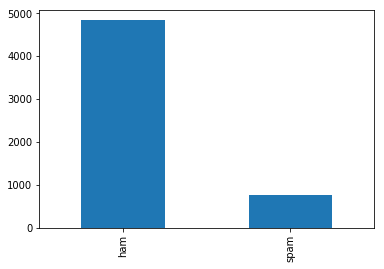

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

data['v1'].value_counts().plot(kind='bar')

In [41]:
xdata = x
ydata = y

In [45]:
#1. 문장을 단어 단위로 토큰화
#2. 단어 토큰 -> 정수로 인코딩
#3. 문장마다 길이가 다르므로 패딩 추가 필요.

In [69]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(xdata) # 각 행에 대한 토큰화 수행
sequences = tokenizer.texts_to_sequences(xdata)
word_index = tokenizer.word_index
len(word_index) # 8920 (voc의 크기)
len(sequences) # 5572 (문장 수)

5572

In [73]:
trainData = int(len(sequences)*0.8)
testData = int(len(sequences)-trainData)

trainData # 4457
testData # 1115

1115

In [92]:
# 각 문장(메일) 중, 최대 길이 출력
max([len(seq) for seq in sequences]) # 189

# 각 문장(메일)들의 평균 길이 출력
np.mean([len(seq) for seq in sequences]) # 15.7948
sum(map(len, sequences))/ len(sequences) # 15.7948

189


15.794867193108399

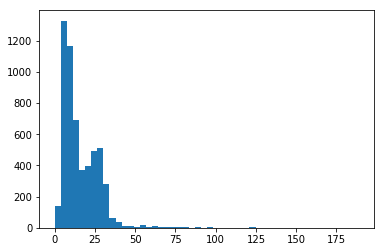

In [91]:
xdata = sequences
plt.hist([len(s) for s in xdata], bins=50) # 각 메일에 등장하는 단어 수
plt.show()

In [93]:
# 가장 긴 메일의 단어 수: 189
# 그런데 50 미만이 대부분.
# 50 이상은 버리는것이 좋겠다.

In [94]:
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [95]:
vocab_size = len(word_index)+1
max_len = max([len(seq) for seq in sequences]) # 189

data = pad_sequences(xdata, maxlen=max_len)
data.shape

(5572, 189)

In [132]:
data[:3]
xtest = data[trainData:]   # 뒤쪽 1115개
ytest = ydata[trainData:]

xtrain = data[:trainData]  # 앞쪽 4457개
ytrain = ydata[:trainData]

In [126]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(xtrain, ytrain, epochs=5, batch_size=60, validation_split=0.2)

Train on 3565 samples, validate on 892 samples
Epoch 1/5
3565/3565 [==============================] - 3s 783us/step - loss: 0.3264 - acc: 0.8920 - val_loss: 0.1370 - val_acc: 0.9664
Epoch 2/5
3565/3565 [==============================] - 2s 589us/step - loss: 0.0990 - acc: 0.9734 - val_loss: 0.0702 - val_acc: 0.9832
Epoch 3/5
3565/3565 [==============================] - 2s 588us/step - loss: 0.0466 - acc: 0.9877 - val_loss: 0.0637 - val_acc: 0.9821
Epoch 4/5
3565/3565 [==============================] - 2s 587us/step - loss: 0.0286 - acc: 0.9916 - val_loss: 0.0543 - val_acc: 0.9843
Epoch 5/5
3565/3565 [==============================] - 2s 595us/step - loss: 0.0179 - acc: 0.9944 - val_loss: 0.0635 - val_acc: 0.9832


In [135]:
cost, acc = model.evaluate(xtest, ytest)
print(cost, acc)

1115/1115 [==============================] - 0s 252us/step
0.06836067696431894 0.9802690582959641
